In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [6]:
X_preprocessed_df = pd.read_csv('../data/heart_disease_preprocessed.csv')
y = pd.read_csv('../data/heart_disease.csv')['target']

In [7]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_preprocessed_df, y)
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_preprocessed_df.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

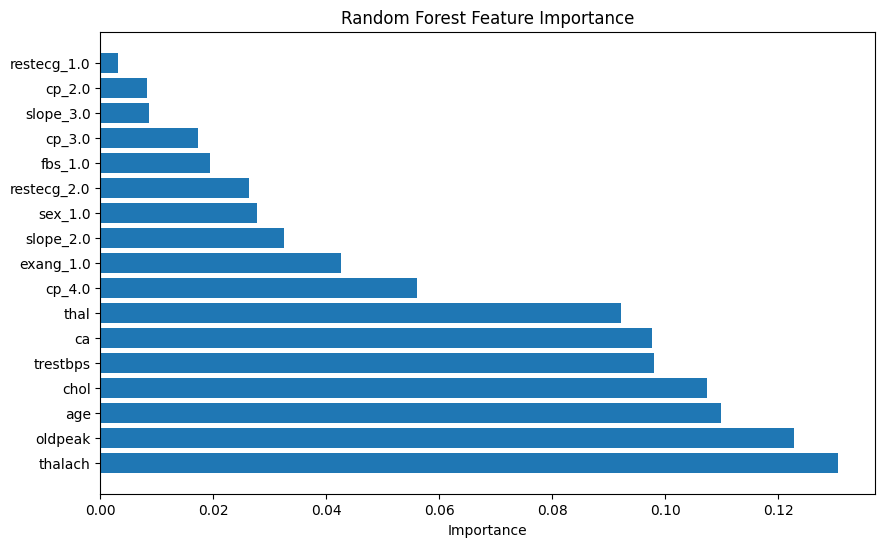

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [9]:
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe.fit(X_preprocessed_df, y)
rfe_features = X_preprocessed_df.columns[rfe.support_].tolist()
print("Selected features by RFE:", rfe_features)

Selected features by RFE: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal', 'cp_4.0', 'exang_1.0', 'slope_2.0']


In [10]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_preprocessed_df)
chi_scores, p_values = chi2(X_scaled, y)
chi2_df = pd.DataFrame({
    'Feature': X_preprocessed_df.columns,
    'Chi2 Score': chi_scores,
    'P-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

In [11]:
selected_features = feature_importance_df['Feature'].head(10).tolist()
X_selected = X_preprocessed_df[selected_features]
X_selected.to_csv('../data/heart_disease_selected_features.csv', index=False)

In [ ]:
chi2_df.to_csv('../results/chi2_results.csv', index=False)

print("Feature selection completed. Selected features:", selected_features)

Feature selection completed. Selected features: ['thalach', 'oldpeak', 'age', 'chol', 'trestbps', 'ca', 'thal', 'cp_4.0', 'exang_1.0', 'slope_2.0']
Reduced dataset saved in 'data/heart_disease_selected_features.csv'.
Chi-square results saved in 'results/chi2_results.csv'.
